In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras import regularizers

In [5]:
SONNETS_FILE = './sonnets.txt'

with open('./sonnets.txt') as f:
    data = f.read()

corpus = data.lower().split("\n")
print(corpus[:-5])

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,', "feed'st thy light'st flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thyself thy foe, to thy sweet self too cruel.', "thou that art now the world's fresh ornament", 'and only herald to the gaudy spring,', 'within thine own bud buriest thy content', 'and, tender churl, makest waste in niggarding.', 'pity the world, or else this glutton be,', "to eat the world's due, by the grave and thee.", 'when forty winters shall beseige thy brow,', "and dig deep trenches in thy beauty's field,", "thy youth's proud livery, so gazed on now,", "will be a tatter'd weed, of small worth held:", "then being ask'd where all thy beauty lies,", 'where all the treasure of thy lusty days,', 'to say, within thine own deep-sunken eyes,', 'were an all-eating

In [6]:
#### tokenizing the words in the corpus

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [8]:
def n_gram_seqs(corpus, tokenizer):
    input_sequences = []

    for line in corpus:

    # Tokenize the current line
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Loop over the line several times to generate the subphrases
        for i in range(1, len(token_list)):

            # Generate the subphrase
            n_gram_sequence = token_list[:i+1]

            # Append the subphrase to the sequences list
            input_sequences.append(n_gram_sequence)
 
    return input_sequences

In [9]:
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [10]:
#testing function on bigger corpus

next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

next_3_examples_sequence

[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

In [11]:
input_sequences = n_gram_seqs(corpus, tokenizer)

max_sequence_len = max([len(x) for x in input_sequences])

In [12]:
max_sequence_len

11

In [13]:
input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [14]:
#function for padding sequences
def pad_seqs(input_sequences, maxlen):
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlen))
    return padded_sequences

In [15]:
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]], dtype=int32)

In [18]:
#padding the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

input_sequences.shape

(15462, 11)

In [19]:
#one-hot encoding

def features_and_labels(input_sequences, total_words):
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)
    return features, one_hot_labels

In [21]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)
first_features

array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]], dtype=int32)

In [23]:
first_labels.shape

(5, 3211)

In [24]:
features, labels = features_and_labels(input_sequences, total_words)

In [26]:
labels.shape

(15462, 3211)

In [32]:
#### create model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2)) 
model.add(LSTM(100))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [33]:
history = model.fit(features, labels, epochs=100, verbose=1)

Epoch 1/100


2022-03-20 21:49:18.047269: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-20 21:49:18.959309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 21:49:19.626298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 21:49:19.673834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 21:49:20.986037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 21:49:22.555180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 21:49:23.142683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

484/484 [==============================] - 20s 31ms/step - loss: 6.9154 - accuracy: 0.0209
Epoch 2/100
484/484 [==============================] - 15s 31ms/step - loss: 6.5054 - accuracy: 0.0215
Epoch 3/100
484/484 [==============================] - 14s 30ms/step - loss: 6.4178 - accuracy: 0.0236
Epoch 4/100
484/484 [==============================] - 14s 30ms/step - loss: 6.3189 - accuracy: 0.0291
Epoch 5/100
484/484 [==============================] - 15s 31ms/step - loss: 6.2097 - accuracy: 0.0332
Epoch 6/100
484/484 [==============================] - 14s 29ms/step - loss: 6.1261 - accuracy: 0.0391
Epoch 7/100
484/484 [==============================] - 15s 30ms/step - loss: 6.0509 - accuracy: 0.0401
Epoch 8/100
484/484 [==============================] - 14s 30ms/step - loss: 5.9741 - accuracy: 0.0440
Epoch 9/100
484/484 [==============================] - 14s 30ms/step - loss: 5.8843 - accuracy: 0.0499
Epoch 10/100
484/484 [==============================] - 15s 31ms/step - loss: 5.7838 

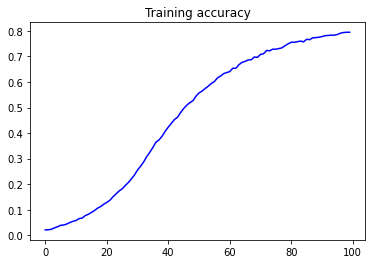

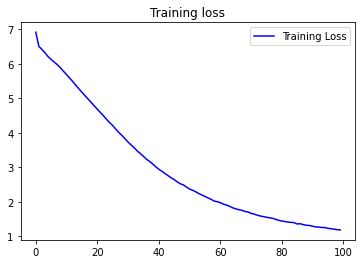

In [34]:
# Take a look at the training curves of the

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [37]:

#not bad, lets try it out now
seed_text = "Oh, how i love the weather today"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted, axis=-1).item()
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

2022-03-20 22:49:27.865781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 22:49:28.154251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 22:49:28.162201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-20 22:49:29.138193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Oh, how i love the weather today seemly as my sins need contains argument light light light fangled ' and rare remain warm'd grow forth worms thee hence well esteem'd esteem'd re skill scope affords weeds survey survey rehearse dyed out thus out for down her strong head of too did stand and make time shown light write of thee well so well dear end bring of men affords dyed lend thee tongue hate words esteem may none remain comment out disgrace so less remain remain torn torn remain near hour untrue tender'd decays confounds him so said there well made rare bail ' so bent her


In [38]:
def predict(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted, axis=-1).item()
        output_word = tokenizer.index_word[predicted]
        seed_text += " " + output_word
    return seed_text

In [39]:
text = 'what a beautiful morning'
number_of_words = 35
predict(text, number_of_words)

"what a beautiful morning not i be deceived parts it so bright awake awake true rhyme fled shall lie hath her bright ' so live away so bad me so well lies free contains free free free brings forth"